
# <center> <font style="color:rgb(100,109,254)">Cartoonify Photos</font>  <center>


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

*So what does a Cartoon essentially looks like, its genrally a smoothed image with not much details and the edges are preserved.*  <br>

If you were asked to produce a cartoon photo from an actual photo what would you do, well you would probably do something to smooth the image while still preserving the edges.

**And we know just exactly which filter to use to accomplish that, A Bilateral Filter**

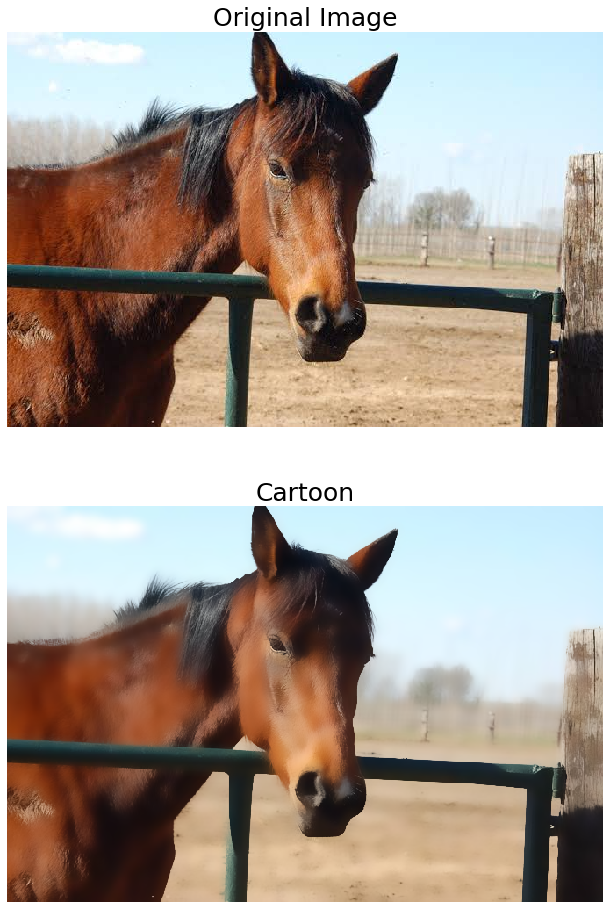

In [10]:
image = cv2.imread('media/M3/horse.jpg')

SigmaColor = 96
SigmaSpace = 413

bi_blur = cv2.bilateralFilter(image,16,SigmaColor,SigmaSpace)


plt.figure(figsize=[16,16])
plt.subplot(211);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(212);plt.imshow(bi_blur[:,:,::-1]);plt.title("Cartoon",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)"> Find the Values for Bilateral Function </font>
Now if you're wondering how to tune the Optimal values to put in the bilateral function then there is a nice script that I have put below that does that

In [11]:
def nothing(x):
    pass
 
cv2.namedWindow("Trackbars")
 
cv2.createTrackbar("sigmacolor", "Trackbars", 100, 500, nothing)
cv2.createTrackbar("sigmaspace", "Trackbars", 100, 500, nothing)
cv2.createTrackbar("diameter", "Trackbars", 9, 45, nothing)

 
while True:  
    image = cv2.imread('media/M3/horse.jpg')

    SigmaColor =cv2.getTrackbarPos("sigmacolor", "Trackbars")
    SigmaSpace = cv2.getTrackbarPos("sigmaspace", "Trackbars")
    d = cv2.getTrackbarPos("diameter", "Trackbars")

    bi_blur = cv2.bilateralFilter(image,11,SigmaColor,SigmaSpace)
   
    stacked = np.hstack((image,bi_blur))
    cv2.imshow("Trackbars",stacked)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
    if key == ord('s'):
        print('Sigma color {} , Sigma Space {} , diameter {}'.format(SigmaColor,SigmaSpace,d))
        break
    
cv2.destroyAllWindows()

# <font style="color:rgb(134,19,348)">Domain Transform for Edge-aware Filtering</font>
Now in Opencv 3 and above another edge preserving filtering has been introduced , now this implementation is based on the paper titled  [*Domain transform for edge-aware image and video processing*](http://www.inf.ufrgs.br/~eslgastal/DomainTransform/Gastal_Oliveira_SIGGRAPH2011_Domain_Transform.pdf)  by **Eduardo Gastal** and **Manuel Oliveira**, Now these filters are faster and has been implemented using 4 different functions.

In filters like bilateral filters we have seen that we have two type of Objectives, one is to give more weightage to pixels closer so that the blurring can be meaningfull and second to average only the similar intensity valued pixels to avoid the edges, so in this both of these objectives are controled by the two following parameters, which is used in all 4 methods.

**`sigma_s`** Just like sigma in other smoothing filters this sigma value controls the area of the neighbourhood (Now Has Range between 0-200)

**`sigma_r`** This param controls the how dissimilar colors within the neighborhood will be averaged. For example a larger value will restrcit color variation and it will enforce that constant color stays throughout. (Now Has Range between 0-1)

## <font style="color:rgb(134,19,348)">Pencil Sketch </font>
You can make pencil sketch like filters by using `cv2.pencilSketch` besides the above two params it also takes an extra param called `shade_factor` which has range 0-0.1 and controls how bright the final output will be by scaling the intensity.

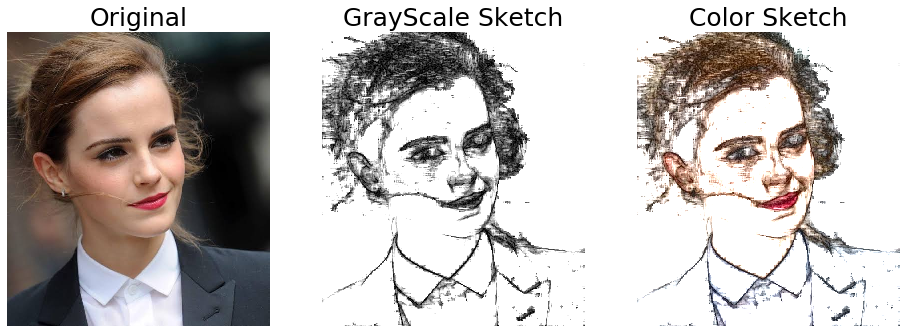

In [12]:
image = cv2.imread('media/M3/MsWatson.jpg')

dst_gray, dst_color = cv2.pencilSketch(image, sigma_s=50, sigma_r=0.09, shade_factor=0.05)
plt.figure(figsize=[16,16])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(132);plt.imshow(dst_gray,cmap='gray');plt.title("GrayScale Sketch",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(133);plt.imshow(dst_color[:,:,::-1]);plt.title("Color Sketch",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)">Edge Preserving Filter </font>
Now the results of this filter is pretty similar to the default biltateral filter, you can use this by using `cv2.edgePreservingFilter()`  

The flag Option selects the type of filtering, there are two options Recursive Filtering (flag=1) and Normalized Convolution Filtering (flag=0), this option is slow and this sharpens the edges.

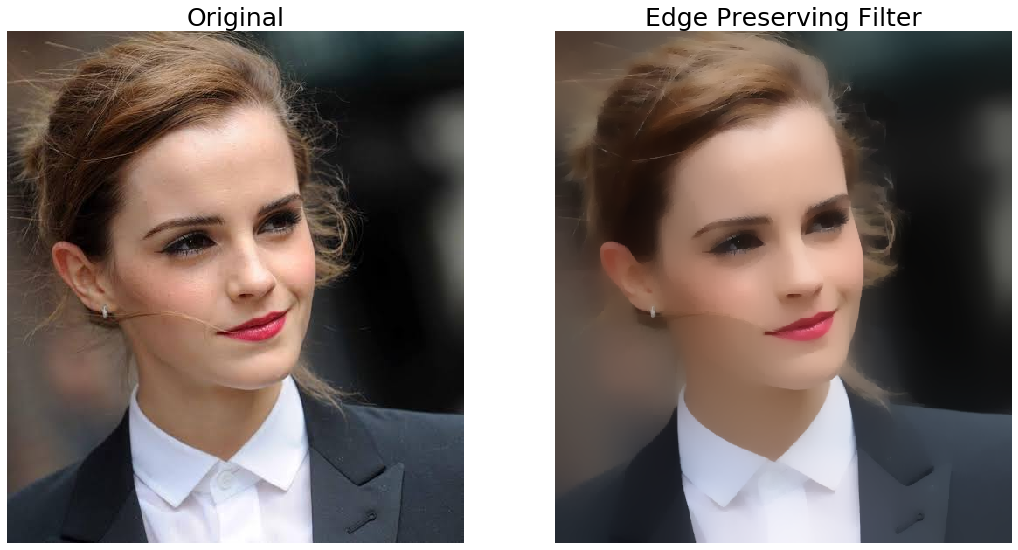

In [15]:
image = cv2.imread('media/M3/MsWatson.jpg')

dst = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.4)
plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(dst[:,:,::-1]);plt.title("Edge Preserving Filter",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)">Detail Enhancing Filter</font>
Now as the name suggests this filter enchances the details (edges, corners). You can use it by using `cv2.detailEnhance()`

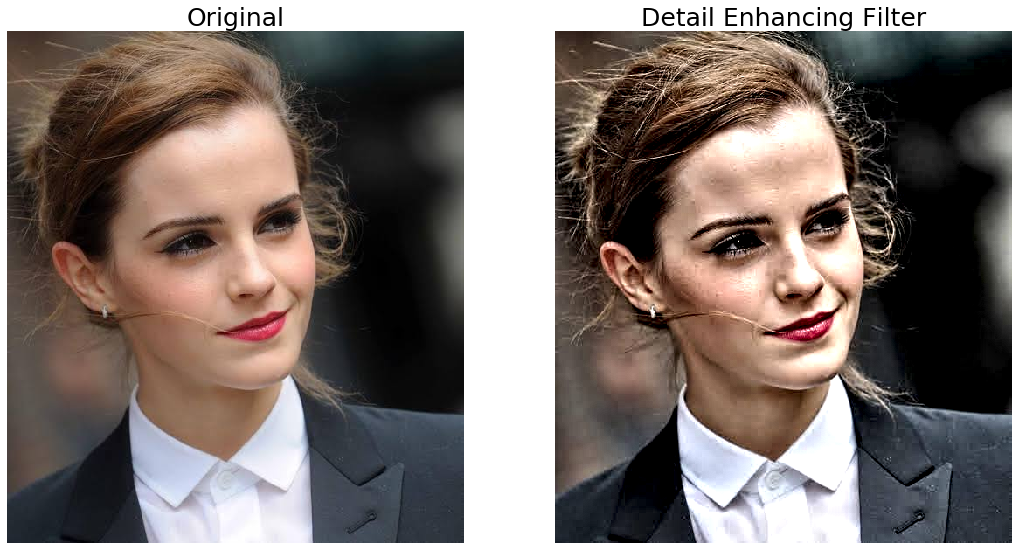

In [16]:
image = cv2.imread('media/M3/MsWatson.jpg')

dst = cv2.detailEnhance(image, sigma_s=30, sigma_r=0.15)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(dst[:,:,::-1]);plt.title("Detail Enhancing Filter",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)">Stylization Filter </font>
Now you can create interesting Cartoon like styles with this filter, use it with `cv2.stylization()` 

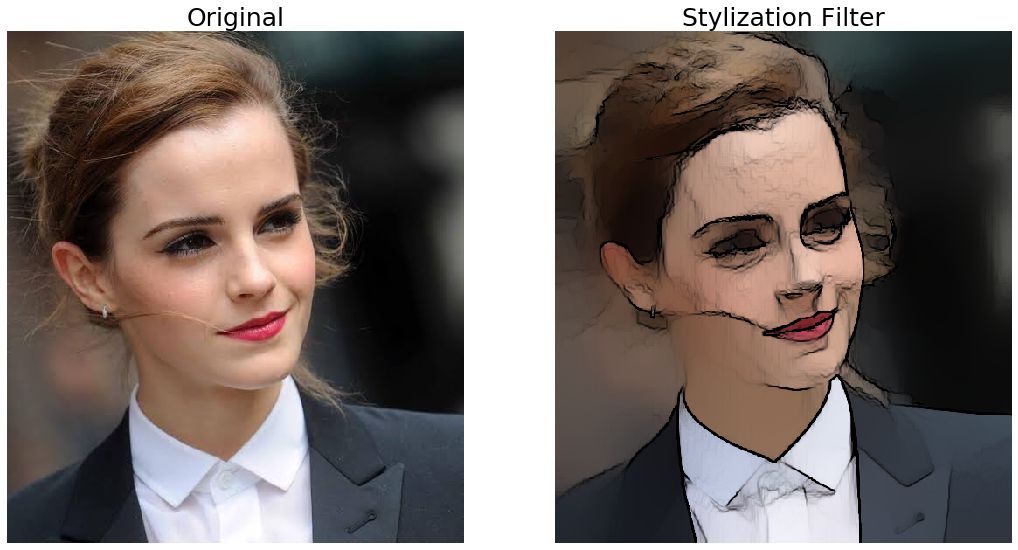

In [17]:
image = cv2.imread('media/M3/MsWatson.jpg')

dst = cv2.stylization(image, sigma_s=50, sigma_r=0.57)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(dst[:,:,::-1]);plt.title("Stylization Filter",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)"> Apply Filters to Real Time Camera Feed </font>
Now with below script you can apply these filters to your camera feed and also tune in the optimal values. You can also adapt the same script to tune values on static pictures.

In [18]:
def nothing(x): 
    pass
 
cv2.namedWindow('Trackbars', cv2.WINDOW_NORMAL)

cv2.createTrackbar("Sigma_c", "Trackbars", 0, 200, nothing)
cv2.createTrackbar("Sigma_r", "Trackbars", 0, 100, nothing)
cv2.createTrackbar("Filter_Type", "Trackbars", 0, 4, nothing)

cap = cv2.VideoCapture(0)  

while True: 
    ret ,frame = cap.read()  
    if not ret:
        break
        
    frame = cv2.flip( frame, 1 ) 

    Sigma_c =cv2.getTrackbarPos("Sigma_c", "Trackbars")
    Sigma_r = cv2.getTrackbarPos("Sigma_r", "Trackbars")
    Sigma_r = (Sigma_r+1) / 100  
    Filter_Type = cv2.getTrackbarPos("Filter_Type", "Trackbars")
    
    if Filter_Type == 0:
        pass
    
    elif Filter_Type == 1:
         frame = cv2.stylization(frame, sigma_s=Sigma_c, sigma_r=Sigma_r)
    elif Filter_Type == 2:
         frame = cv2.detailEnhance(frame, sigma_s=Sigma_c, sigma_r=Sigma_r)
    elif Filter_Type == 3:
         frame = cv2.edgePreservingFilter(frame, flags=1, sigma_s=60, sigma_r=Sigma_r)
    elif Filter_Type == 4:
         _ , frame = cv2.pencilSketch(frame, sigma_s=Sigma_c, sigma_r=0.09, shade_factor=Sigma_r)

   
    cv2.imshow("Trackbars", frame)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
    if key == ord('s'):
        print('Sigma_c {} , Sigma_r {} , Filter {}'.format(Sigma_c,Sigma_r,Filter_Type))
        break
    
cap.release()
cv2.destroyAllWindows()